<a href="https://colab.research.google.com/github/sumaia42/Ostad_Course/blob/main/Module12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

**load the csv**

In [2]:
#code here

In [3]:
df = pd.read_csv('/content/titanic_full.csv')
df

,Pclass,Fare,Survived
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1
3,1,53.1000,1
4,3,8.0500,0
...,...,...,...
1303,3,8.0500,0
1304,1,108.9000,1
1305,3,7.2500,0
1306,3,8.0500,0


**Check the null value**

In [4]:
#code here

In [5]:
df.isnull().sum()

Pclass      0
Fare        0
Survived    0
dtype: int64

**Plot the data**

In [6]:
#code here

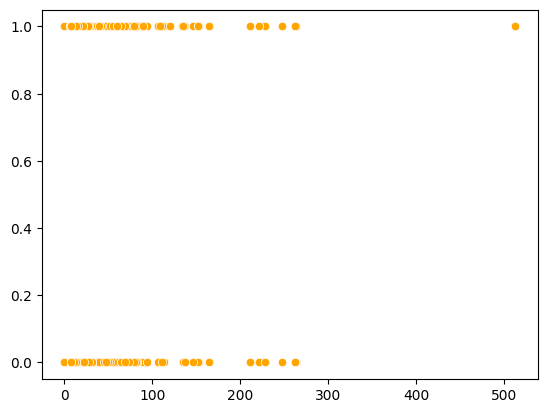

In [7]:
sns.scatterplot(x='Fare', y='Survived', data=df, color='orange')

plt.xlabel('')
plt.ylabel('')

plt.show()

**Separate the Features a target in x and y**

In [8]:
#code here

In [9]:
X = df.drop(['Survived'],axis=1)
y = df["Survived"]

**Split the train and test data**

In [10]:
#code here

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=5)

**Make the model Binary logistic regression model**

In [12]:
#code here

In [13]:
model = LogisticRegression()
model.fit(Xtrain, ytrain.values.ravel())

LogisticRegression()

**Check the model score**

In [14]:
#code here

In [15]:
predictions = model.predict(Xtest)
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       254
           1       0.61      0.39      0.47       139

    accuracy                           0.69       393
   macro avg       0.66      0.63      0.63       393
weighted avg       0.68      0.69      0.67       393

